In [2]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [8]:
def detect_face(img, n):
    
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor.dat")
    
    # load the input image, resize it, and convert it to grayscale
    image = img
#     image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x-n, y-n), (x + w+n, y + h+n), (0, 255, 0), 2)

        # show the face number
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (255, 255, 255), 4)
            
        
        plt.imshow(image)
        plt.show()



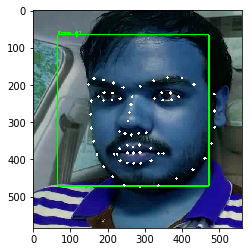

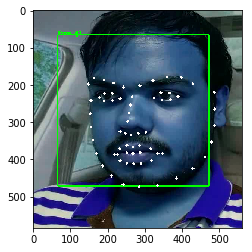

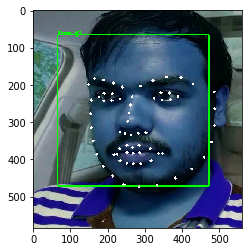

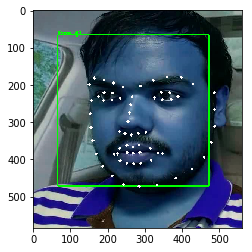

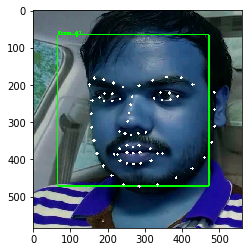

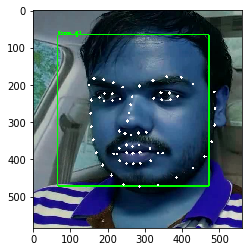

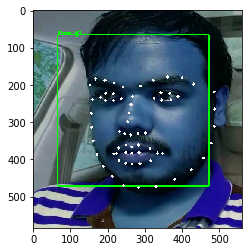

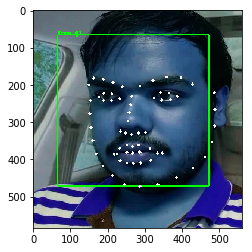

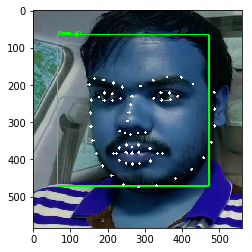

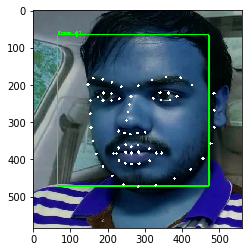

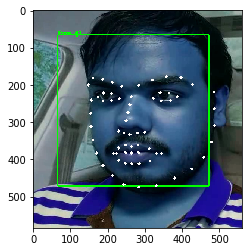

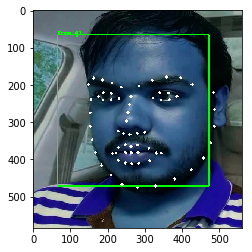

KeyboardInterrupt: 

In [10]:
f =9
vid = cv2.VideoCapture('/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user2/driver_view_cropped/sample_'+str(f)+'.avi')

count =0

while(True):
    ret, frame = vid.read()
    if(ret == False):
        break
    
    detect_face(frame, 10)
    
#     x = np.load('/ssd_scratch/cvit/isha2/DGM_final2/dataset_samples_callibrated/user2/explicit_face_features/landmarks_sample_'+str(f)+'.npy')
#     y = x[count]
    
#     for j in range(68):
#         cv2.circle(frame, (y[j,0], y[j,1]), 2, (255, 255, 255), 4)
        
#     plt.imshow(frame)
#     plt.show()
#     count += 1